# ATIVIDADE 6

Grupo: <br>
<b>CLEYDSON DE SOUZA FERREIRA JUNIOR <br>FELIPE GONTIJO SIQUEIRA <br>MARIANA DA SILVA MARTINS. </b>

1. Implemente o Algoritmo A*, usando a Busca em Largura como modelo e usando uma fila de prioridade para a fronteira. 

In [15]:
class MinHeap:
    def __init__(self):
        # Inicializa uma lista vazia para armazenar os elementos do heap
        self.contents = []
        # Capacidade máxima do heap
        self.capacity = 0
        # Tamanho atual do heap
        self.size = 0

    def remove_min(self):
        # Verifica se o heap está vazio
        if self.size < 1:
            return None
        
        # Armazena o menor elemento (elemento na raiz do heap)
        minimo = self.contents[0]
        # Substitui o elemento na raiz pelo último elemento do heap
        self.contents[0] = self.contents[self.size-1]
        # Decrementa o tamanho do heap
        self.size -= 1
        # Restabelece a propriedade do min-heap
        self.__min_heapify(0)

        return minimo

    def adiciona(self, node):
        # Índice para inserir o novo nó
        indice = self.size
        # Verifica se o heap está cheio e expande se necessário
        if self.capacity == self.size:
            self.contents.append(node)
            self.capacity += 1
        # Insere o novo nó no heap
        self.__insert(indice, node)
        # Incrementa o tamanho do heap
        self.size += 1

    def __pai(self, i):
        # Retorna o índice do pai do nó na posição i
        return (i - 1) // 2

    def __filho_esquerdo(self, i):
        # Retorna o índice do filho esquerdo do nó na posição i
        return i * 2 + 1

    def __filho_direito(self, i):
        # Retorna o índice do filho direito do nó na posição i
        return i * 2 + 2

    def __swap(self, i, j):
        # Troca os elementos nos índices i e j
        self.contents[i], self.contents[j] = self.contents[j], self.contents[i]

    def __min_heapify(self, i):
        # Restabelece a propriedade do min-heap a partir do nó na posição i
        l = self.__filho_esquerdo(i)
        r = self.__filho_direito(i)

        minimo = i

        if l < self.size and self.contents[i].f() > self.contents[l].f():
            minimo = l

        if r < self.size and self.contents[minimo].f() > self.contents[r].f():
            minimo = r

        if minimo != i:
            self.__swap(i, minimo)
            self.__min_heapify(minimo)

    def __insert(self, i, node):
        # Insere o nó na posição i do heap
        self.contents[i] = node
        # Mantém a propriedade do min-heap atualizando os nós pai conforme necessário
        while i > 0 and self.contents[self.__pai(i)].f() > self.contents[i].f():
            self.__swap(i, self.__pai(i))
            i = self.__pai(i)


class PriorityQueue:
    def __init__(self):
        # Inicializa uma fila de prioridade com um heap mínimo
        self.heap = MinHeap()

    def remove_min(self):
        # Remove e retorna o menor elemento da fila de prioridade
        return self.heap.remove_min()

    def adiciona(self, node):
        # Adiciona um novo nó à fila de prioridade
        self.heap.adiciona(node)


2. Usando a implementação do A* desenvolvida para a questão anterior, resolva o problema de busca de rotas na Romênia (de Arad a Bucareste), usando os dados do livro (incluindo a função heurística). Mostre o passo a passo da solução.

In [16]:
graph = {
    'Arad': {'Zerind': 75, 'Sibiu': 140, 'Timisoara': 118},
    'Zerind': {'Arad': 75, 'Oradea': 71},
    'Oradea': {'Zerind': 71, 'Sibiu': 151},
    'Sibiu': {'Arad': 140, 'Oradea': 151, 'Fagaras': 99, 'Rimnicu Vilcea': 80},
    'Timisoara': {'Arad': 118, 'Lugoj': 111},
    'Lugoj': {'Timisoara': 111, 'Mehadia': 70},
    'Mehadia': {'Lugoj': 70, 'Drobeta': 75},
    'Drobeta': {'Mehadia': 75, 'Craiova': 120},
    'Craiova': {'Drobeta': 120, 'Rimnicu Vilcea': 146, 'Pitesti': 138},
    'Rimnicu Vilcea': {'Sibiu': 80, 'Craiova': 146, 'Pitesti': 97},
    'Fagaras': {'Sibiu': 99, 'Bucharest': 211},
    'Pitesti': {'Rimnicu Vilcea': 97, 'Craiova': 138, 'Bucharest': 101},
    'Bucharest': {'Fagaras': 211, 'Pitesti': 101, 'Giurgiu': 90, 'Urziceni': 85},
    'Giurgiu': {'Bucharest': 90},
    'Urziceni': {'Bucharest': 85, 'Hirsova': 98, 'Vaslui': 142},
    'Hirsova': {'Urziceni': 98, 'Eforie': 86},
    'Eforie': {'Hirsova': 86},
    'Vaslui': {'Urziceni': 142, 'Iasi': 92},
    'Iasi': {'Vaslui': 92, 'Neamt': 87},
    'Neamt': {'Iasi': 87}
}

heuristic = {
    'Arad': 366, 'Zerind': 374, 'Oradea': 380, 'Sibiu': 253, 'Timisoara': 329,
    'Lugoj': 244, 'Mehadia': 241, 'Drobeta': 242, 'Craiova': 160, 'Rimnicu Vilcea': 193,
    'Fagaras': 176, 'Pitesti': 100, 'Bucharest': 0, 'Giurgiu': 77, 'Urziceni': 80,
    'Hirsova': 151, 'Eforie': 161, 'Vaslui': 199, 'Iasi': 226, 'Neamt': 234
}

class Node:
    def __init__(self, value, parent=None, g=0, h=0):
        self.value = value
        self.parent = parent
        self.g = g
        self.h = h

    def f(self):
        return self.g + self.h

def a_star(start, goal):
    open_list = PriorityQueue()
    closed_list = set()

    start_node = Node(start, None, 0, heuristic[start])
    goal_node = Node(goal)

    open_list.adiciona(start_node)

    while open_list.heap.size > 0:
        current_node = open_list.remove_min()

        if current_node.value == goal_node.value:
            path = []
            while current_node is not None:
                path.append(current_node.value)
                current_node = current_node.parent
            return path[::-1]

        closed_list.add(current_node.value)

        neighbors = graph[current_node.value]
        for neighbor in neighbors:
            if neighbor not in closed_list:
                neighbor_g = current_node.g + neighbors[neighbor]
                neighbor_h = heuristic[neighbor]
                neighbor_node = Node(neighbor, current_node, neighbor_g, neighbor_h)

                existing_open_node = next((node for node in open_list.heap.contents if node.value == neighbor), None)
                if existing_open_node:
                    if neighbor_node.f() < existing_open_node.f():
                        existing_open_node.parent = current_node
                        existing_open_node.g = neighbor_g
                else:
                    open_list.adiciona(neighbor_node)

        print("\nFronteira:[")
        for node in open_list.heap.contents:
            print(node.value, node.f())
        print(']')
        print("\n")

    return None

print(a_star('Arad', 'Bucharest'))



Fronteira:[
Sibiu 393
Zerind 449
Timisoara 447
]



Fronteira:[
Rimnicu Vilcea 413
Fagaras 415
Oradea 671
Zerind 449
Timisoara 447
]



Fronteira:[
Fagaras 415
Timisoara 447
Pitesti 417
Zerind 449
Craiova 526
Oradea 671
]



Fronteira:[
Pitesti 417
Timisoara 447
Bucharest 450
Zerind 449
Craiova 526
Oradea 671
]



Fronteira:[
Timisoara 447
Zerind 449
Bucharest 418
Oradea 671
Craiova 526
Oradea 671
]



Fronteira:[
Bucharest 418
Zerind 449
Craiova 526
Oradea 671
Lugoj 473
Oradea 671
]


['Arad', 'Sibiu', 'Rimnicu Vilcea', 'Pitesti', 'Bucharest']


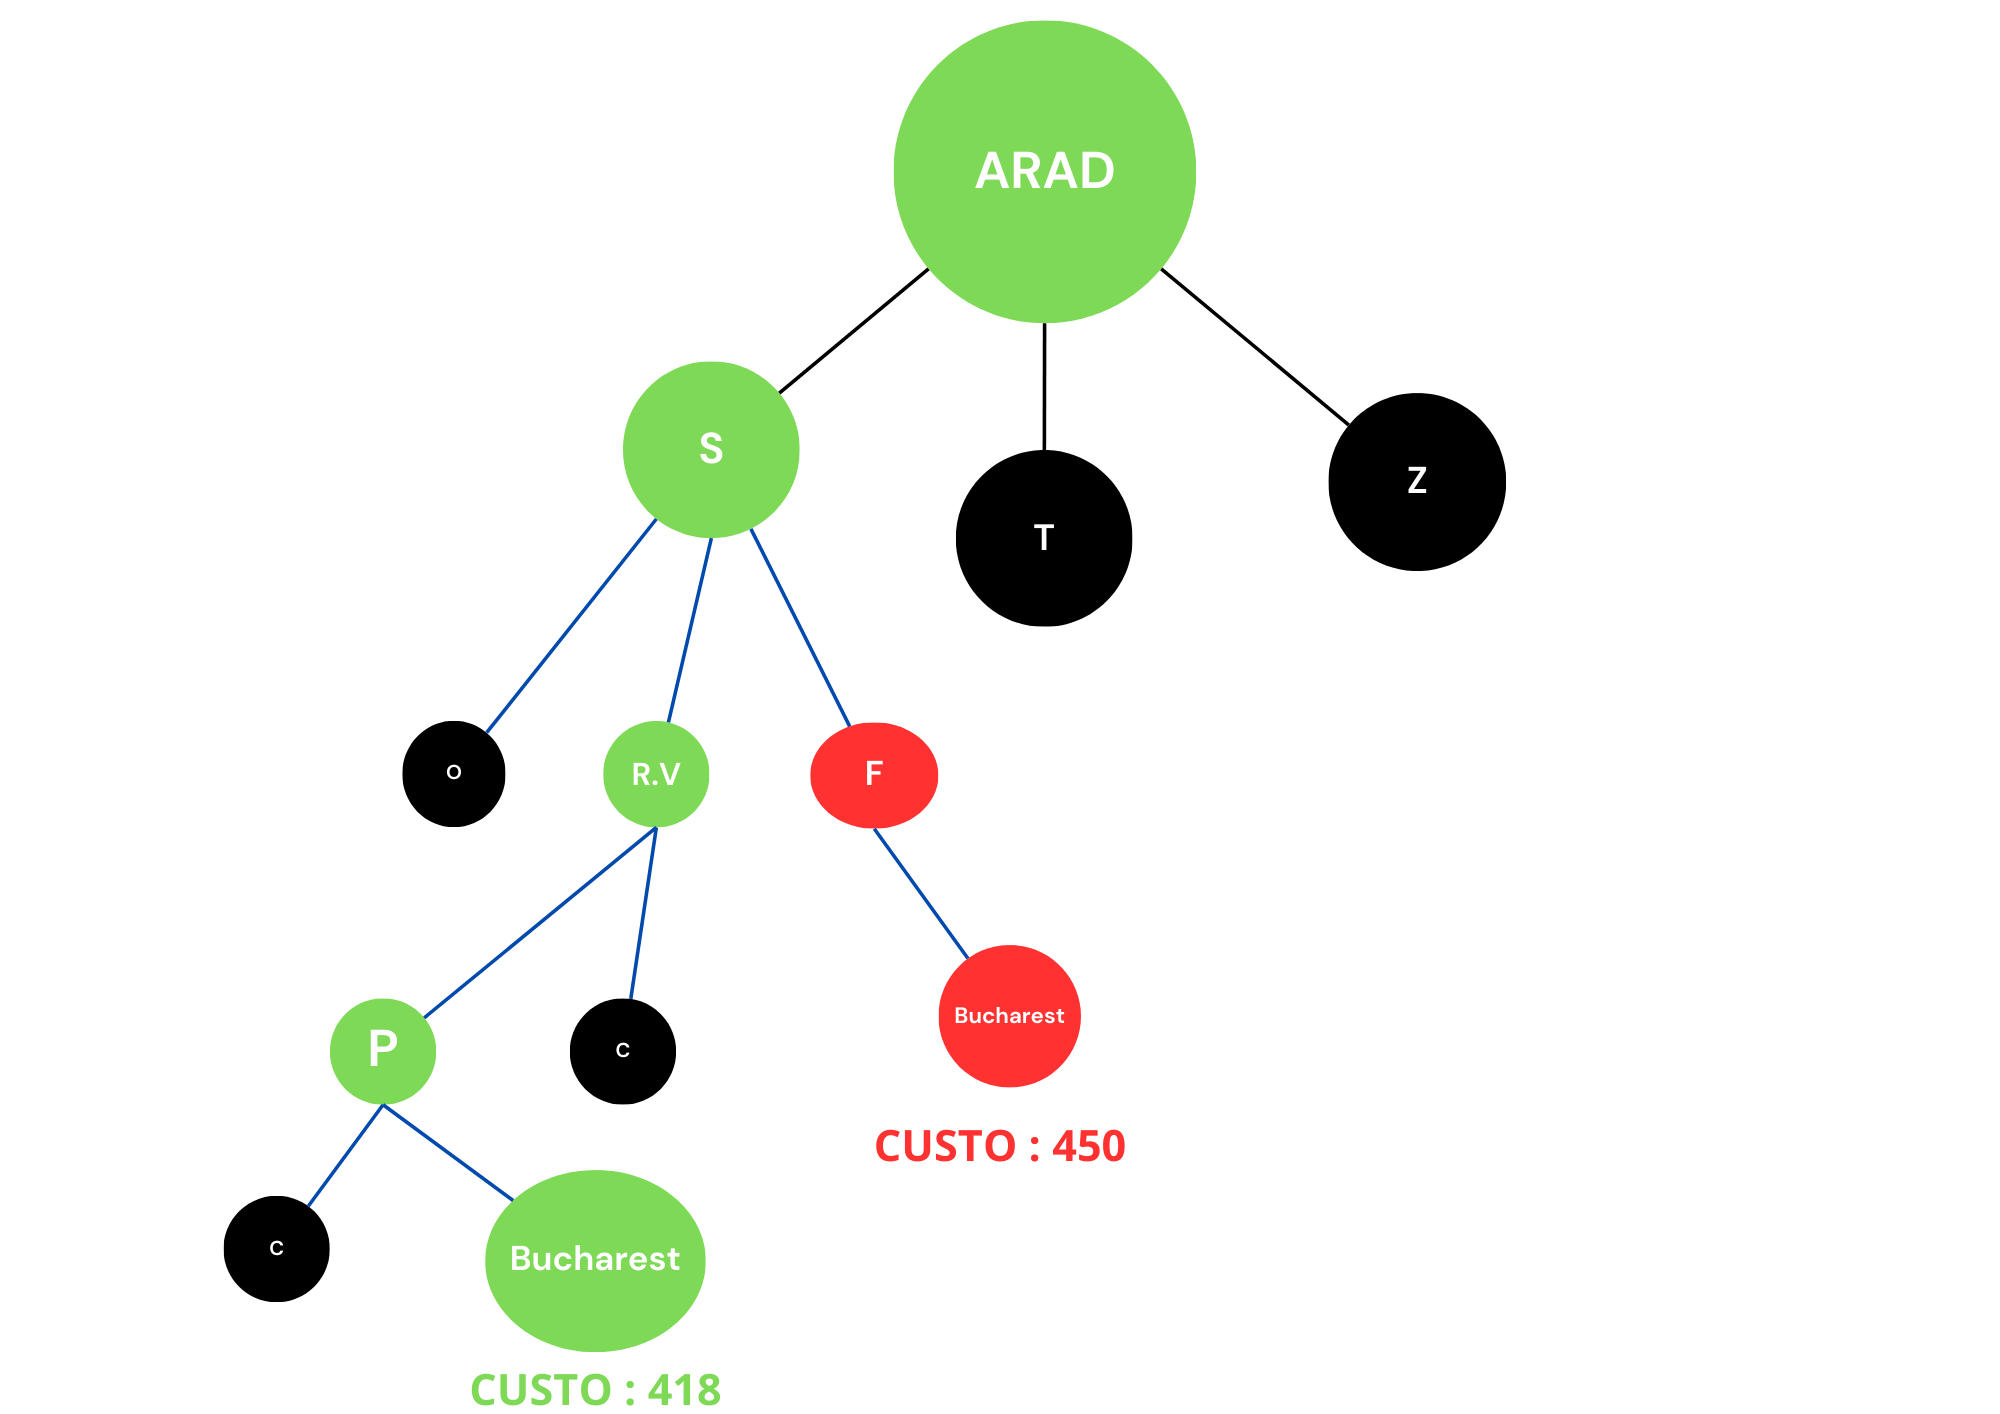

In [17]:
from IPython.display import Image, display
display(Image(filename='grafo.png'))

3. A função heurística mostrada no livro não pode ser utilizada para buscar a rota até outras cidades de destino na Romênia (tem que ser Bucareste), mas pode ser usada na busca de rotas mudando a cidade de origem (ao invés de Arad). Proponha e simule a busca de rotas de pelo menos duas outras cidades até Bucareste. Mostre o passo a passo do algoritmo buscando a solução.

In [18]:
# Testando o algoritmo A* para encontrar a rota de 'Sibiu' a 'Bucharest'
a_star('Sibiu', 'Bucharest')


Fronteira:[
Rimnicu Vilcea 273
Fagaras 275
Arad 506
Oradea 531
]



Fronteira:[
Fagaras 275
Pitesti 277
Arad 506
Oradea 531
Craiova 386
]



Fronteira:[
Pitesti 277
Bucharest 310
Arad 506
Oradea 531
Craiova 386
]



Fronteira:[
Bucharest 278
Craiova 386
Arad 506
Oradea 531
Craiova 386
]




['Sibiu', 'Rimnicu Vilcea', 'Pitesti', 'Bucharest']

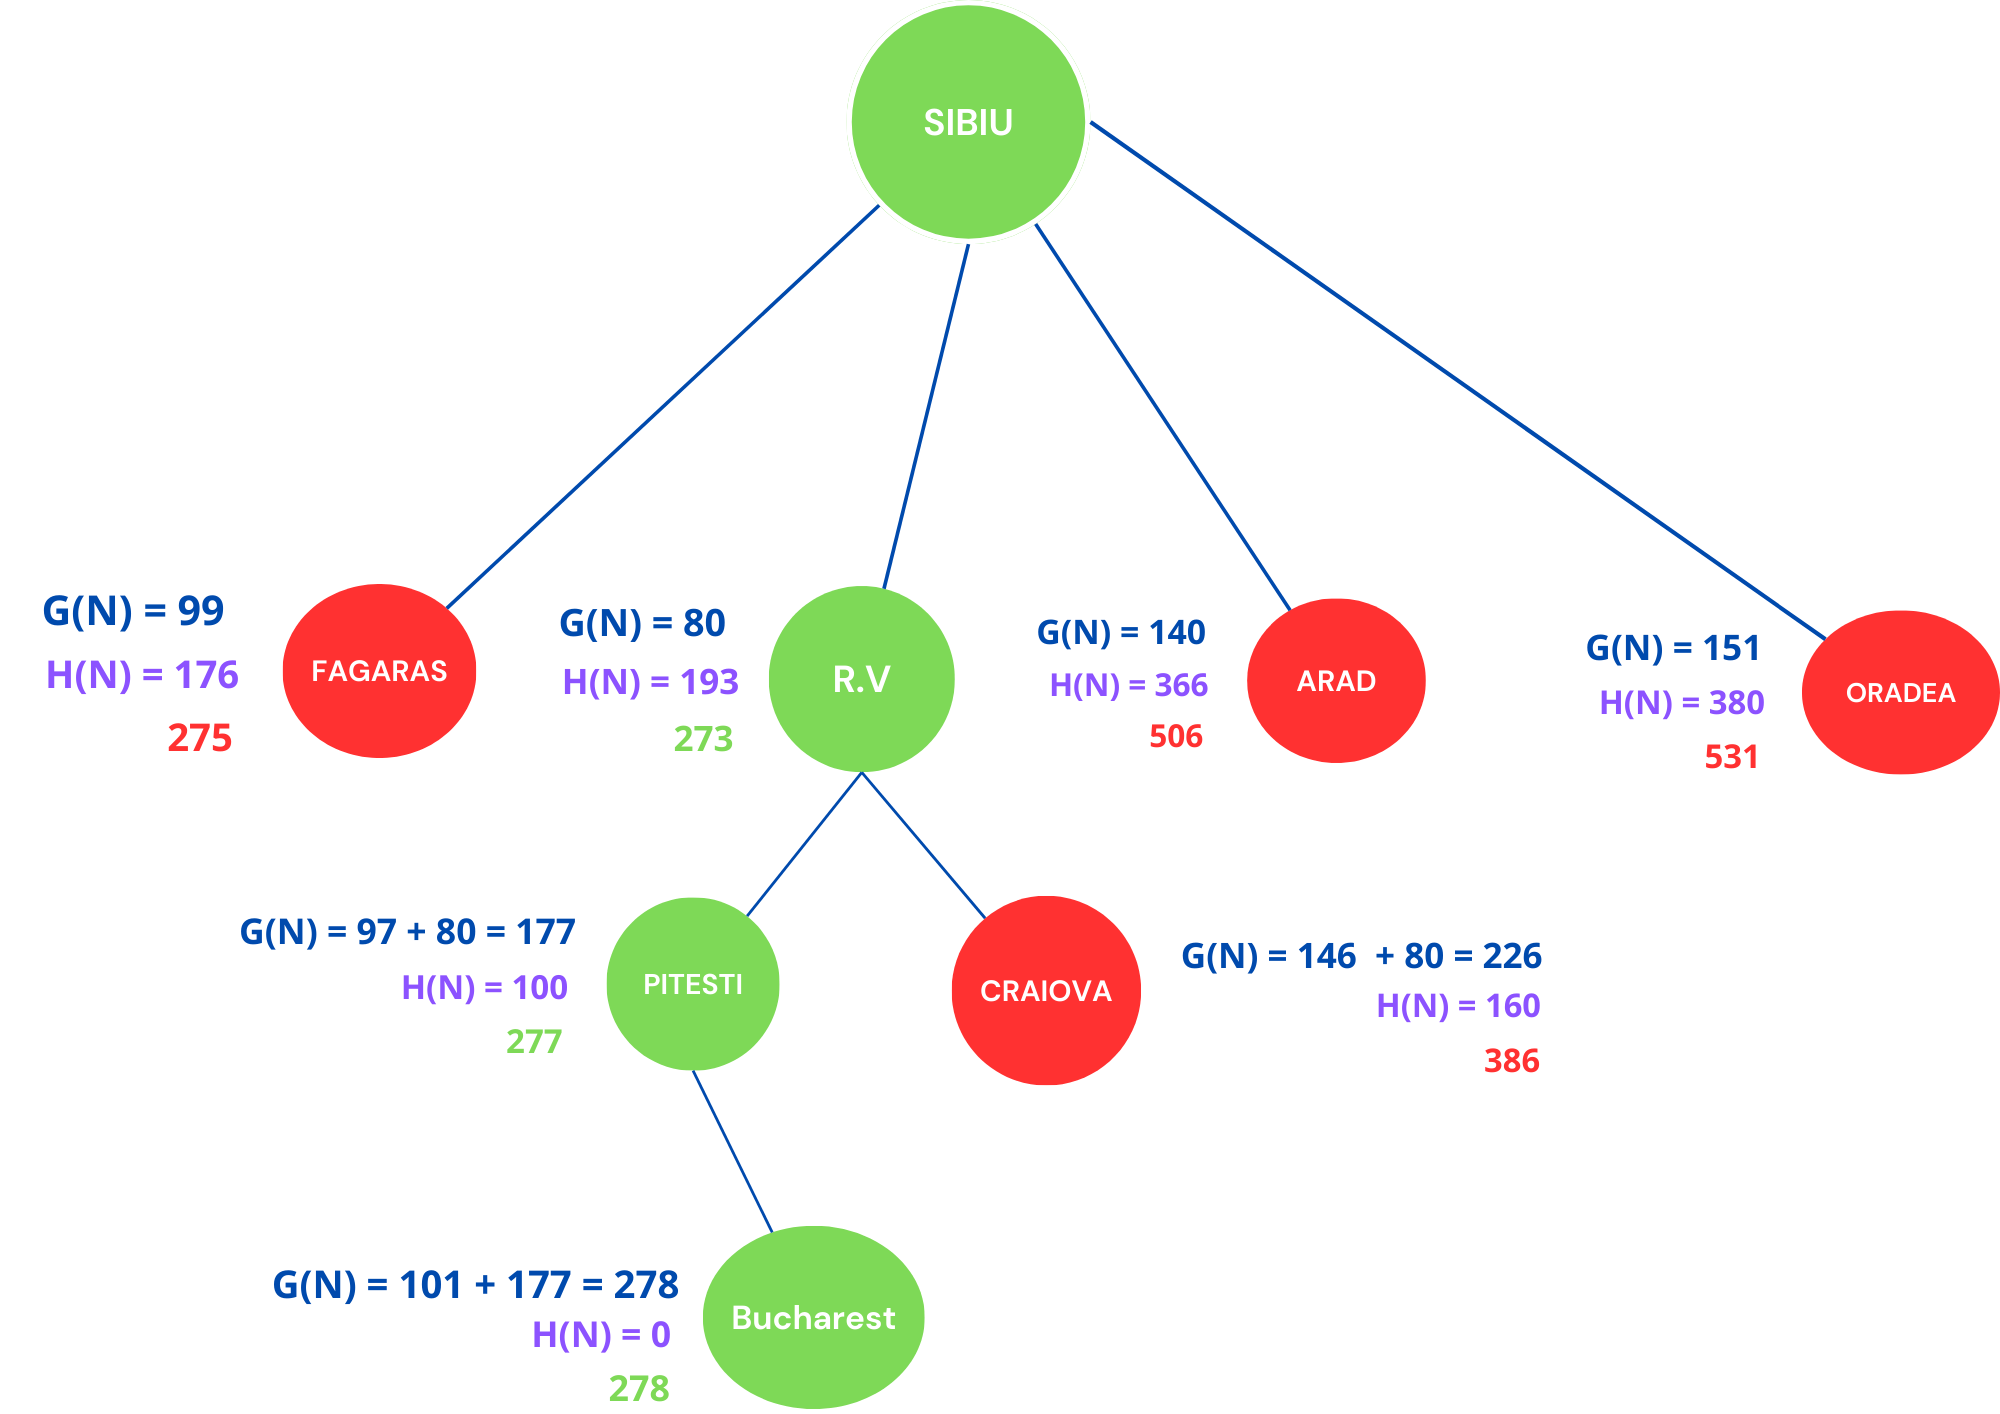

In [19]:
display(Image(filename='grafo-3.1.png'))

In [20]:
# Testando o algoritmo A* para encontrar a rota de 'Oradea' a 'Bucharest'
a_star('Oradea', 'Bucharest')


Fronteira:[
Sibiu 404
Zerind 445
]



Fronteira:[
Rimnicu Vilcea 424
Fagaras 426
Zerind 445
Arad 657
]



Fronteira:[
Fagaras 426
Pitesti 428
Zerind 445
Arad 657
Craiova 537
]



Fronteira:[
Pitesti 428
Bucharest 461
Zerind 445
Arad 657
Craiova 537
]



Fronteira:[
Zerind 445
Bucharest 429
Craiova 537
Arad 657
Craiova 537
]



Fronteira:[
Bucharest 429
Arad 512
Craiova 537
Arad 512
Craiova 537
]




['Oradea', 'Sibiu', 'Rimnicu Vilcea', 'Pitesti', 'Bucharest']

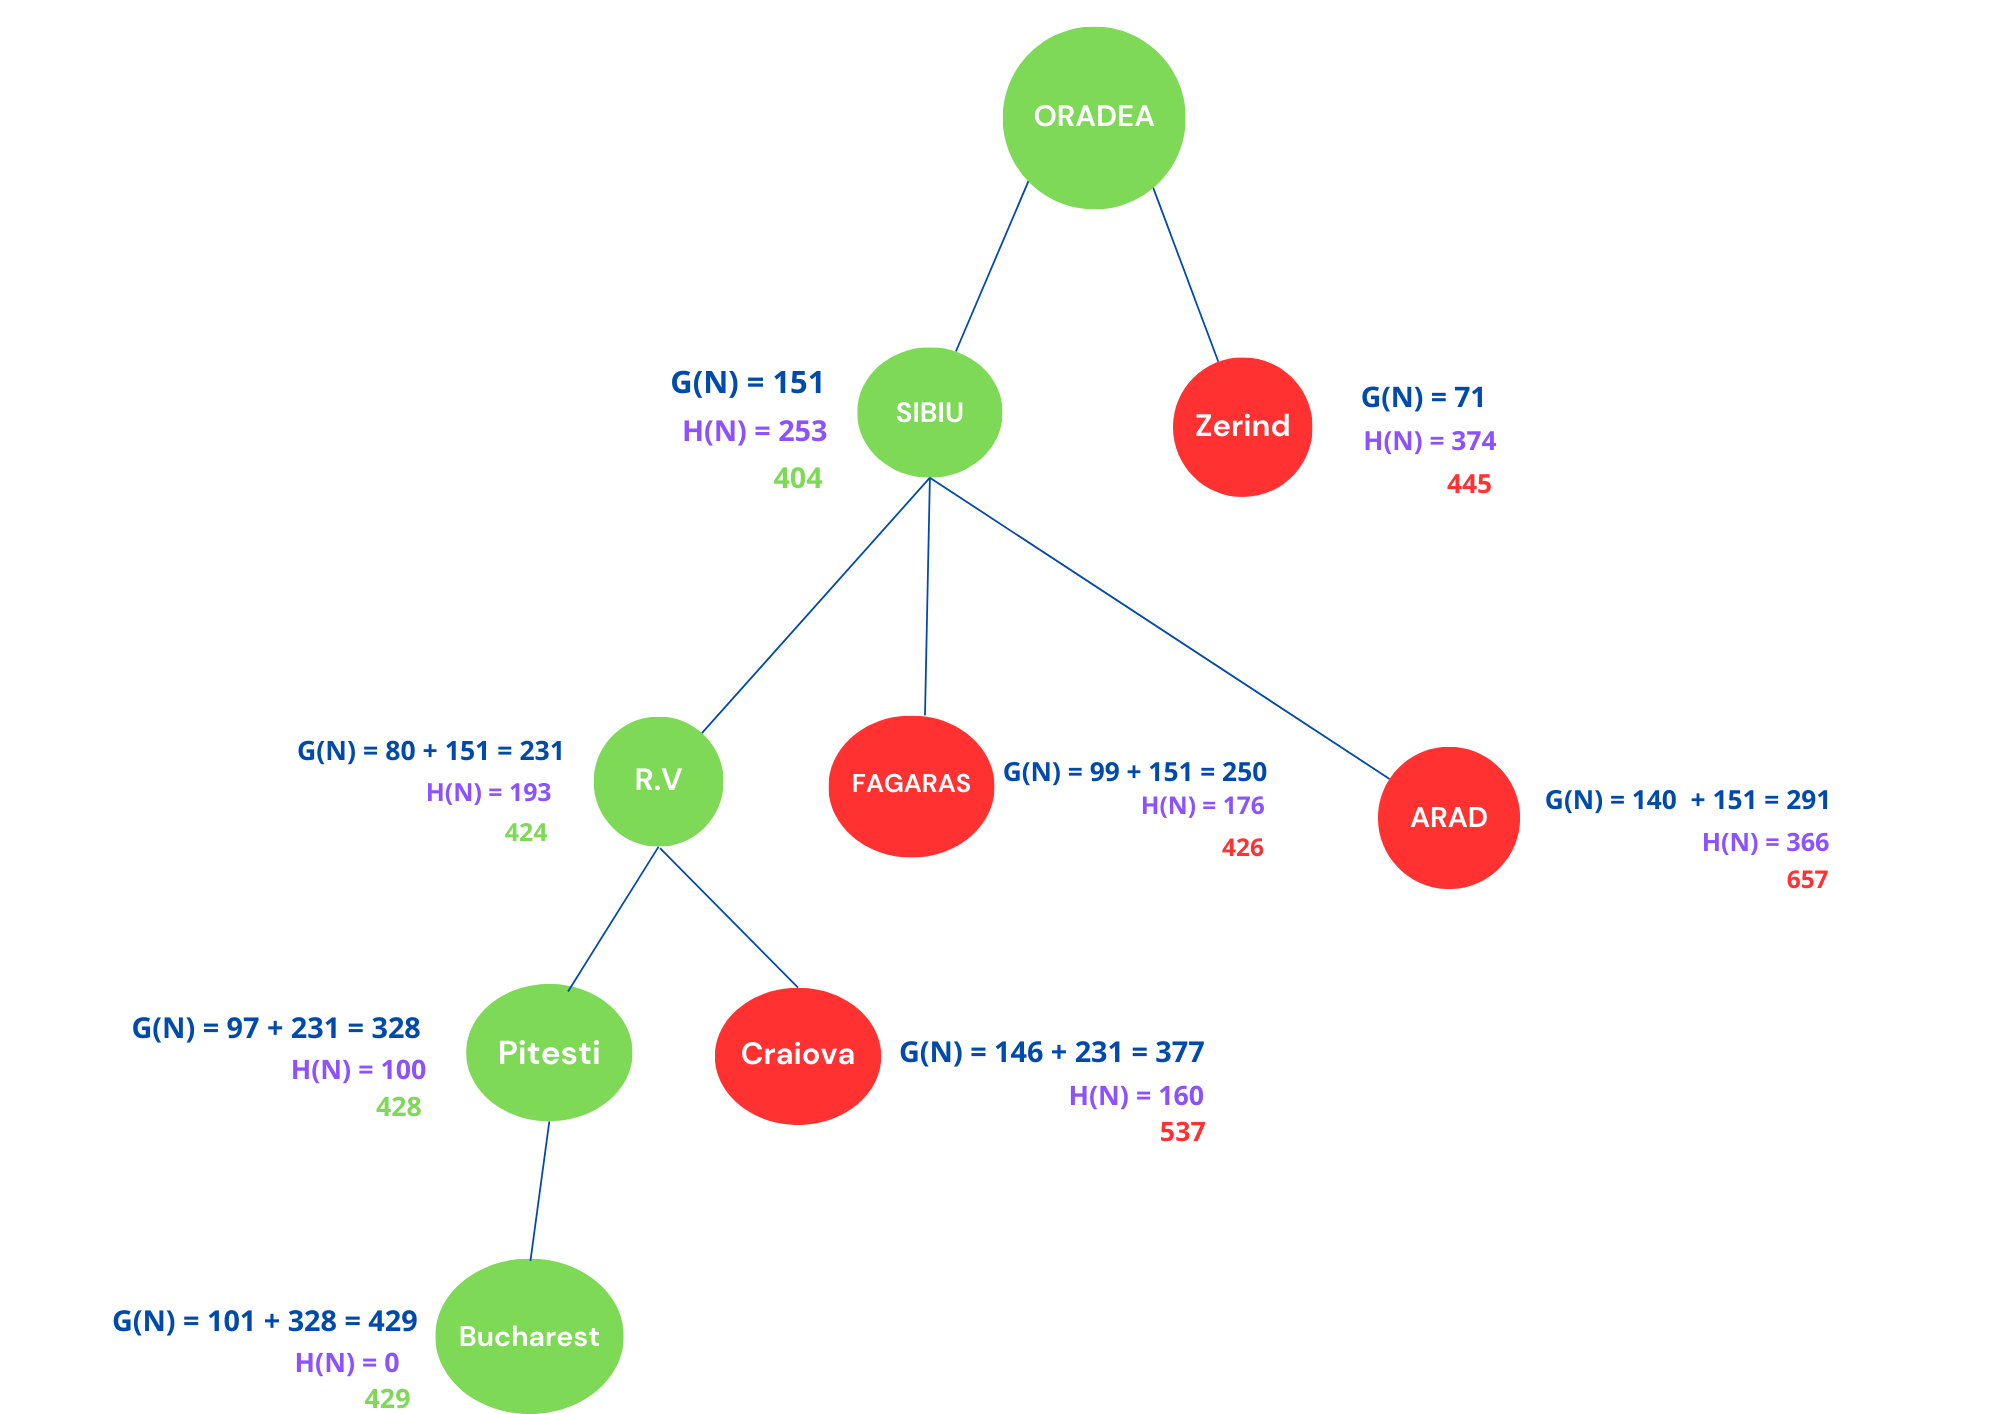

In [21]:
display(Image(filename='grafo-3.2.png'))